In [7]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
images, labels = galaxy10.load_data()

# Normalize pixel values
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=10)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

C:\Users\ddaga\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [3]:
model_deep = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

d:\Projects\galaxy-classifier\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [4]:
model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
history_deep = model_deep.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 909s 2s/step - accuracy: 0.1886 - loss: 2.4764 - val_accuracy: 0.3329 - val_loss: 1.7998
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 921s 2s/step - accuracy: 0.3407 - loss: 1.7909 - val_accuracy: 0.3921 - val_loss: 1.6702
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 921s 2s/step - accuracy: 0.4204 - loss: 1.5708 - val_accuracy: 0.4293 - val_loss: 1.5558
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - accuracy: 0.5126 - loss: 1.3667 - val_accuracy: 0.4963 - val_loss: 1.3975
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 919s 2s/step - accuracy: 0.6484 - loss: 1.0034 - val_accuracy: 0.5121 - val_loss: 1.4894


In [6]:
deep_eval = model_deep.evaluate(test_images, test_labels)
print(f'Deep CNN Test Accuracy: {deep_eval[1]}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 34s 301ms/step - accuracy: 0.5048 - loss: 1.5106
Deep CNN Test Accuracy: 0.5121195316314697


111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 291ms/step


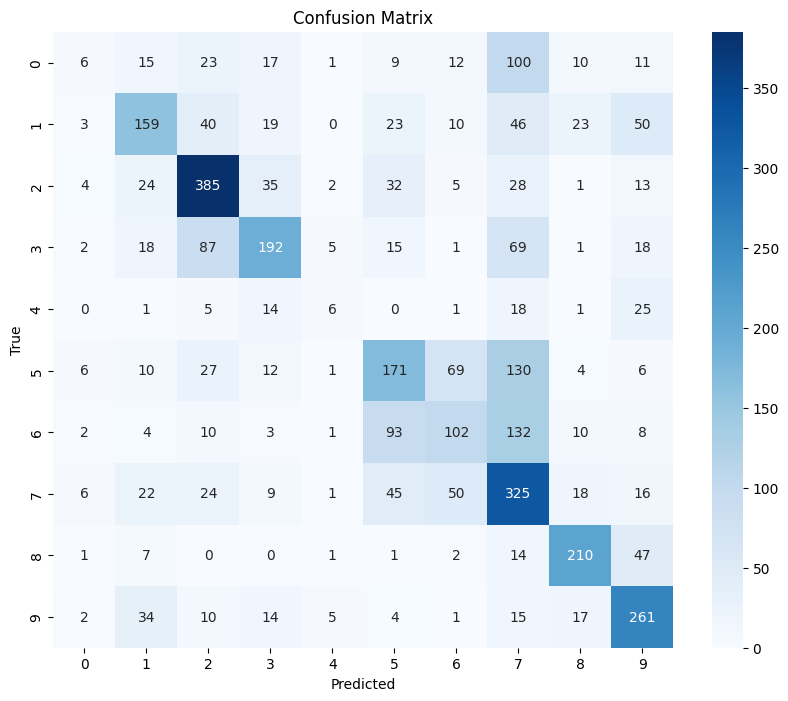

In [8]:
predictions = model_deep.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Assuming test_labels are one-hot encoded, get the true classes
true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')#, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()